# Quantum Algorithms and Simulations

**Instructor** : Hwajung Kang, Ph.D., Quantum Computational Scientist, IBM Quantum

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import AerSimulator

## Quantum circuit construction

### Phase Kick-back

We showed interference pattern simulating quantum circuits using phase gate (`p`) in the first session. We can also produce same interference using quantum circuits implementing phase kick-back.

**Q. Build quantum circuits to produce interferenece implementing phase kickback with control ry gate (`cry`). Execute circuits on `Aersimulator` and plot intererene pattern.**

In [4]:
## Your code goes here


















### Bernstein-Vazirani 

**Q. Construct a quantum circuit implementing Bernstein-Vazirani algorithm to find the secret bit string $a = 1101$ of the function,
$f:\{0, 1\}^n \rightarrow \{0, 1\}$ and
$f(x) = x\cdot a~(mod2)$.  Simulate the circuit using `Aersimulator`.**

In [1]:
## your code goes here


















### Grover algorithm

**Q. Consruct  and simulate a quantum circuit implementing grover algorithm when the oracle has two solutions '000' and '111'.**

- [combining circuits](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html)

- [composite gates](https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html)

In [2]:
## your code goes here


















### Quantum Phase Estimation (QPE)

**Q. Build and simulate a QPE circuit to find an eigenvalue of $U$ that is not one varying the number of counting qubits from one to three where** 

\begin{equation}
U = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i\frac{\pi}{4}}\\
\end{pmatrix}.
\end{equation}

**Plot and compare the results.**  

- [Qiskit circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html)
- [QFT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.QFT.html#qiskit.circuit.library.QFT)

In [17]:
from qiskit.circuit.library import QFT

In [16]:
## your code goes here























### Statevector simulation

Returns a final quantum statevector.

In [75]:
from qiskit.quantum_info import Statevector

[quantum_info module](https://qiskit.org/documentation/apidoc/quantum_info.html#module-qiskit.quantum_info)

#### Exact Distribution - GHZ state

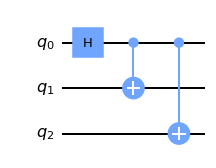

In [76]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0, [1, 2])
ghz.draw('mpl')

In [34]:
st_ghz = Statevector(ghz)
print(st_ghz)
prob_ghz = st_ghz.probabilities_dict()
prob_ghz

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


{'000': 0.4999999999999999, '111': 0.4999999999999999}

#### Quantum state preparation

In [3]:
from qiskit.quantum_info import random_unitary
import numpy.linalg as la

In [35]:
n_st = 2
Urand_new = random_unitary(2**n_st)
vals_new, vecs_new = la.eig(Urand_new)
val_new, st_new = vals_new[1], vecs_new[:, 1]

In [36]:
qc_st_new = QuantumCircuit(n_st)
qc_st_new.initialize(st_new, range(n_st))

st_new_gen = Statevector(qc_st_new)

print('state: {}'.format(st_new))
print('state generated: {}'.format(st_new_gen.data))

state: [ 0.7634461 +0.j          0.44024167+0.00070152j -0.34967153+0.03530124j
  0.18316172+0.25743399j]
state generated: [ 0.7634461 +1.11022302e-16j  0.44024167+7.01520373e-04j
 -0.34967153+3.53012383e-02j  0.18316172+2.57433995e-01j]


In [37]:
print(la.norm(st_new.data - st_new_gen.data)) 

2.914335439641036e-16


#### Track quantum states - Grover

Intermediate state - check Oracle

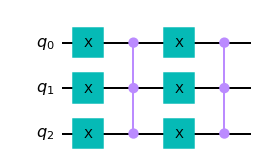

In [38]:
oracle.draw('mpl')

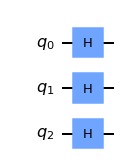

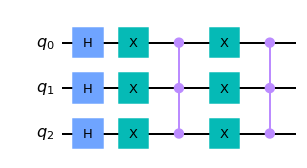

In [39]:
qc_inp = QuantumCircuit(3) 
qc_inp.h(range(3))
display(qc_inp.draw('mpl'))

Oout = qc_inp.compose(oracle)
display(Oout.draw('mpl'))

In [40]:
st_Oout = Statevector(Oout)
st_Oout

Statevector([-0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
              0.35355339+0.j, -0.35355339+0.j],
            dims=(2, 2, 2))


Final state 

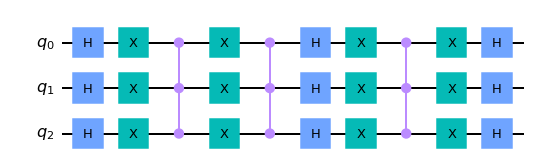

In [41]:
grover = Oout.compose(amp)
grover.draw('mpl')

In [42]:
grover_st = Statevector(grover)
np.round(grover_st, 3)

array([-0.707+0.j, -0.   +0.j,  0.   +0.j, -0.   +0.j, -0.   +0.j,
        0.   +0.j, -0.   +0.j, -0.707+0.j])

In [43]:
prob_grover = grover_st.probabilities_dict()
prob_grover

{'000': 0.4999999999999993,
 '001': 3.1697683532918522e-68,
 '010': 3.9621727475551315e-35,
 '011': 1.814210694026673e-34,
 '100': 1.814210694026673e-34,
 '101': 3.9621727475551315e-35,
 '110': 3.1697683532918522e-68,
 '111': 0.4999999999999993}